### Demo notebook to estimate ZI models using KDE
We try to estimate the underlying distribution using Guassian Kernel. Semiparametric estimation of underlying distribution

In [84]:
import numpy as np
from scipy import stats
from graspy.simulations import er_nm, er_np
from graspy.simulations import sbm
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from sklearn.neighbors import KernelDensity

#### Start with ER graphs

In [68]:
n = 100
p = 0.4 ## prob of edge existing 
np.random.seed(1)
G1 = er_np(n=n, p=p)
zeros = G1[G1 ==0]


In [69]:
### Need to make the edges a Guassian distribution

def edgeDistribution(graph, mean, var): 
    for index, x in np.ndenumerate(graph):
        if x == 1:
            graph[index] = np.random.normal(mean,var) ##just use standard normal
    return(graph)


In [70]:
G1 = edgeDistribution(G1, 0,1)
G1

array([[ 0.        , -0.60735181,  0.        , ...,  0.        ,
         0.        , -0.14037099],
       [ 0.14164167,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.06152691],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.40334744],
       [-2.502177  ,  0.61644834,  0.        , ...,  0.        ,
         0.59709506,  0.        ]])

#### The first parameter to estimate is the edge non-existence

In [73]:
def probZero(graphs,shape):
    prob = ((graphs == 0).sum())/(shape**2) ##1st sum how many zeros and then to find prob, divide total number of edges
    return(prob) 

In [79]:
prob = probZero(graphs = G1, shape = G1.shape[0])
prob

0.6054

#### Working with edge existence using KDE

In [42]:
normalValues = G1[G1 != 0] ##extracting the remaining normals to fit the KDE


trainValues, testValues = np.split(normalValues, 2, axis = 0) 
testValues.shape

(1973,)

In [43]:
## 
kernel = stats.gaussian_kde(trainValues) ##first train the kernel 
print(kernel)


est = np.zeros(testValues.shape[0]) ##to store the output of the kernel func
for index, x in np.ndenumerate(testValues):
    est[index] = kernel.evaluate(testValues[index]) ##test the kernel on the testValues 
    
print(est)

[0.15138298 0.39548098 0.27242735 ... 0.21465542 0.28319794 0.33787535]


<BarContainer object of 6054 artists>

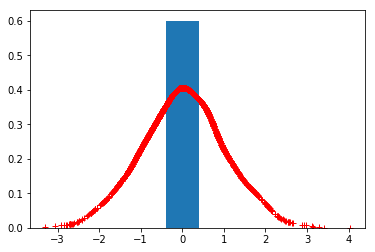

In [59]:
plt.figure()
plt.plot(testValues,est, 'r+')
plt.bar(zeros, height = 0.6, width=0.8)

### Try the same ER model but with a non-Gaussian edge  

In [80]:
n = 100
p = 0.4 ## prob of edge existing 
np.random.seed(1)
G2 = er_np(n=n, p=p)
zeros2 = G2[G2 ==0]

In [81]:
for index, x in np.ndenumerate(G2):
    if x == 1:
        G2[index] = np.random.exponential(4) ##just use exponential with lamba = 1/4
print(G2)

[[ 0.          5.50533316  0.         ...  0.          0.
   3.24539269]
 [ 1.53074456  0.          0.         ...  0.          0.
   3.86254465]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.0329085 ]
 [16.42502729  0.24583833  0.         ...  0.          3.42523816
   0.        ]]


In [83]:
expoValues = G2[G2 != 0] ##extracting the remaining normals to fit the KDE
trainValues2, testValues2 = np.split(expoValues, 2, axis = 0) 



In [94]:
kernel2 = KernelDensity(bandwidth=1.0,  kernel = 'tophat')
kernel2.fit(trainValues2, y = None)


TypeError: float() argument must be a string or a number, not 'KernelDensity'